<a href="https://colab.research.google.com/github/maskot1977/PythonCourse2019/blob/master/FMODB_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Google colaboratoryについて**

**各セルの実行方法**

- 左端の▶ボタン、もしくはCellにカーソルを合わせてshift+Enter
- 順番があるので上から順番に一個ずつCellを実行する。

**マジックコマンド**
- !や％を初めにつけると、ipython環境でbashコマンドを実行できる。
- e.g. !ls, %cd

**ヘルプ**
- ?や??で関数の定義を参照可能
  - ?pd.read_csv
  - ??df.head

**1.セットアップ**

In [ ]:
!ls

sample_data


In [ ]:
# ダウンロード
!wget https://gist.githubusercontent.com/kyusque/dc4af6fa4acf19cdf6e8045b4bdbbdbb/raw/fea8ba22a1d6e25a46a1ed505b5741d9b505eaf0/6324Z.csv

--2020-10-29 01:59:51--  https://gist.githubusercontent.com/kyusque/dc4af6fa4acf19cdf6e8045b4bdbbdbb/raw/fea8ba22a1d6e25a46a1ed505b5741d9b505eaf0/6324Z.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 56695 (55K) [text/plain]
Saving to: ‘6324Z.csv’

6324Z.csv           100%[===================>]  55.37K  --.-KB/s    in 0.03s   

2020-10-29 01:59:51 (2.09 MB/s) - ‘6324Z.csv’ saved [56695/56695]



In [ ]:
!ls

6324Z.csv  sample_data


**1.1 (追記)自前でアップロードする場合**

今回は時間短縮のためあらかじめ用意したファイルをダウンロードしましたが、自前のファイルをアップロードするには以下の方法が使えます。

In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [ ]:
#!ls #アップロード出来たか確認

←左横のフォルダボタンを押してアップロードでも可


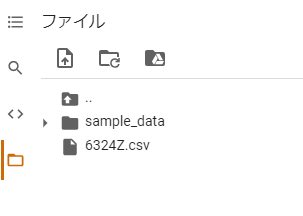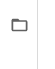

**2.データの読み込み&プロット**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 

**2.1 プロット**

**2.1.1 データ読み込み**

下のセルではFMODBで得られたデータを読み込んで変数dfに代入します。

In [ ]:
df = pd.read_csv("6324Z.csv", index_col=False) #csvファイルの読み込み。ヘッダーとレコードのコンマの数が現状合っていないためindex_col=Falseが必要。
df.head(3) # 先頭数行のデータを表示

,FMODB ID,frag_I,frag_J,DIST,Total,ES,EX,CT_mix,DI(MP2),q(I=>J),frag_Num,Chain,Res #,RES,FCHARGE,MAINSIDE,q_Mulliken,q_NPA,FMO_method,Fragmentation,FMO2_HF:Total_energy,FMO2_MP2:Total_energy,Ligand,Ligand_name
0,6324Z,359.0,1.0,33.642,0.111,0.111,0.0,0.0,0.0,0.0,1,A,1,SER,0,MainSide,0.011,0.006,FMO2-MP2/6-31G(d),NaN,-127120.335735,-127477.076204,NaN,NaN
1,6324Z,359.0,2.0,30.051,-0.094,-0.094,0.0,0.0,0.0,0.0,2,A,2,GLY,0,MainSide,-0.061,-0.028,FMO2-MP2/6-31G(d),NaN,-127120.335735,-127477.076204,NaN,NaN
2,6324Z,359.0,3.0,24.952,0.003,0.003,0.0,0.0,0.0,0.0,3,A,3,PHE,0,MainSide,0.018,-0.002,FMO2-MP2/6-31G(d),NaN,-127120.335735,-127477.076204,NaN,NaN


**2.1.2 列の取り出し**

見やすさのため今回使う列のみ取り出しておきます。

In [ ]:
df = df[['FMODB ID', 'Total', 'ES', 'EX', 'CT_mix', 'DI(MP2)', 'Res #', "RES"]]
df

,FMODB ID,Total,ES,EX,CT_mix,DI(MP2),Res #,RES
0,6324Z,0.111,0.111,0.0,0.0,0.0,1,SER
1,6324Z,-0.094,-0.094,0.0,0.0,0.0,2,GLY
2,6324Z,0.003,0.003,0.0,0.0,0.0,3,PHE
3,6324Z,7.704,7.704,0.0,0.0,0.0,4,ARG
4,6324Z,8.446,8.446,0.0,0.0,0.0,5,LYS
...,...,...,...,...,...,...,...,...
354,6324Z,0.039,0.039,0.0,0.0,0.0,656,HOH
355,6324Z,0.096,0.096,0.0,0.0,0.0,665,HOH
356,6324Z,0.073,0.073,0.0,0.0,0.0,666,HOH
357,6324Z,-0.059,-0.059,0.0,0.0,0.0,696,HOH


**2.1.3 NaNの除去**

リガンドの行がNaNになっているので除去します。

In [ ]:
df = df.dropna() # RESカラムがNaNのものを除外
df

,FMODB ID,Total,ES,EX,CT_mix,DI(MP2),Res #,RES
0,6324Z,0.111,0.111,0.0,0.0,0.0,1,SER
1,6324Z,-0.094,-0.094,0.0,0.0,0.0,2,GLY
2,6324Z,0.003,0.003,0.0,0.0,0.0,3,PHE
3,6324Z,7.704,7.704,0.0,0.0,0.0,4,ARG
4,6324Z,8.446,8.446,0.0,0.0,0.0,5,LYS
...,...,...,...,...,...,...,...,...
353,6324Z,0.066,0.066,0.0,0.0,0.0,655,HOH
354,6324Z,0.039,0.039,0.0,0.0,0.0,656,HOH
355,6324Z,0.096,0.096,0.0,0.0,0.0,665,HOH
356,6324Z,0.073,0.073,0.0,0.0,0.0,666,HOH


**2.1.4 水分子との相互作用を除去**

今回は水分子との相互作用を除去します。

In [ ]:
df = df[~df['RES'].str.contains('HOH')] # 水との相互作用を除去。~はdf.str.contains('HOH')[クラスPandas.Series]の否定を表す
df

,FMODB ID,Total,ES,EX,CT_mix,DI(MP2),Res #,RES
0,6324Z,0.111,0.111,0.0,0.0,0.0,1,SER
1,6324Z,-0.094,-0.094,0.0,0.0,0.0,2,GLY
2,6324Z,0.003,0.003,0.0,0.0,0.0,3,PHE
3,6324Z,7.704,7.704,0.0,0.0,0.0,4,ARG
4,6324Z,8.446,8.446,0.0,0.0,0.0,5,LYS
...,...,...,...,...,...,...,...,...
299,6324Z,0.078,0.078,0.0,0.0,0.0,300,CYS
300,6324Z,0.038,0.038,0.0,0.0,0.0,301,SER
301,6324Z,-0.036,-0.036,0.0,0.0,0.0,302,GLY
302,6324Z,0.082,0.082,0.0,0.0,0.0,303,VAL


**2.1.5 Dimer-ES近似の相互作用を除去**

Dimer-ES近似になるような遠い残基との相互作用を除去する

In [ ]:
df = df[(df['EX'] != 0) | (df['CT_mix'] != 0) | (df['DI(MP2)'] != 0)] # Dimer-ES近似ではないPIEのみ取り出す。
df

,FMODB ID,Total,ES,EX,CT_mix,DI(MP2),Res #,RES
22,6324Z,-10.464,-9.382,0.290,-0.500,-0.872,23,GLY
23,6324Z,-11.327,-13.442,13.906,-4.016,-7.775,24,THR
24,6324Z,-7.359,-4.039,3.182,-1.704,-4.798,25,THR
25,6324Z,2.253,2.488,0.002,-0.050,-0.186,26,THR
40,6324Z,-11.674,-5.220,5.129,-2.360,-9.223,41,HIS
41,6324Z,-9.207,-8.221,0.007,-0.310,-0.683,42,VAL
42,6324Z,-6.728,-6.434,-0.001,-0.009,-0.285,43,ILE
43,6324Z,-0.225,1.348,0.071,-0.315,-1.330,44,CYS
44,6324Z,-22.322,-20.528,13.769,-6.246,-9.316,45,THR
45,6324Z,4.537,3.940,4.471,3.016,-6.889,46,SER


**2.1.6 グラフのラベル作成**

グラフ描画のx軸で表示させるラベルに使うため、残基と残基番号をまとめた列を作成します。

In [ ]:
label_list = [str(i).strip() + str(int(j)).strip() for i, j in zip(df['RES'], df['Res #'])] # 残基名と残基番号を結合して一つのラベルにする。内容は、内包表記でzipを使って二つの列から上から順番に1組ずつ値を取り出して、それぞれをi,jに代入した後、文字列として結合する。その際、strip()で文字の左右の空白を取り除く
df = df.assign(label = label_list) # 先のlabel_listをlabel列として新たに追加
df

,FMODB ID,Total,ES,EX,CT_mix,DI(MP2),Res #,RES,label
22,6324Z,-10.464,-9.382,0.290,-0.500,-0.872,23,GLY,GLY23
23,6324Z,-11.327,-13.442,13.906,-4.016,-7.775,24,THR,THR24
24,6324Z,-7.359,-4.039,3.182,-1.704,-4.798,25,THR,THR25
25,6324Z,2.253,2.488,0.002,-0.050,-0.186,26,THR,THR26
40,6324Z,-11.674,-5.220,5.129,-2.360,-9.223,41,HIS,HIS41
41,6324Z,-9.207,-8.221,0.007,-0.310,-0.683,42,VAL,VAL42
42,6324Z,-6.728,-6.434,-0.001,-0.009,-0.285,43,ILE,ILE43
43,6324Z,-0.225,1.348,0.071,-0.315,-1.330,44,CYS,CYS44
44,6324Z,-22.322,-20.528,13.769,-6.246,-9.316,45,THR,THR45
45,6324Z,4.537,3.940,4.471,3.016,-6.889,46,SER,SER46


**2.1.7 グラフ描画**

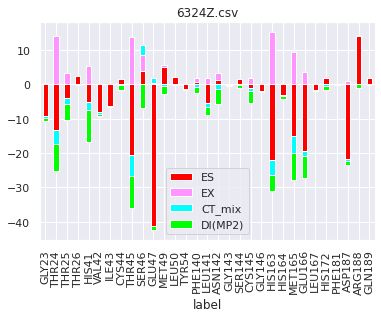

In [ ]:
fig = df[['label', 'ES', 'EX', 'CT_mix', 'DI(MP2)']].set_index('label').plot.bar(stacked=True, color=['#ff0000', '#ff93ff', '#00ffff', '#00ff00'] , title="6324Z.csv") # グラフ描画用のPIEを取り出して積み上げバープロット
fig

**2.1.8 まとめ**

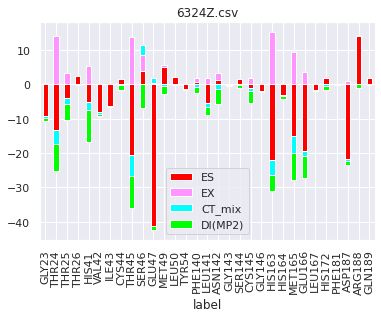

In [ ]:
df = pd.read_csv("6324Z.csv", index_col=False) #csvファイルの読み込み。ヘッダーとレコードのコンマの数が現状合っていないためindex_col=Falseが必要。
df = df[['FMODB ID', 'Total', 'ES', 'EX', 'CT_mix', 'DI(MP2)', 'Res #', "RES"]]
df = df.dropna() # RESカラムがNaNのものを除外。~はdf.isnull()[クラスPandas.Series]の否定を表す
label_list = [str(i).strip() + str(int(j)).strip() for i, j in zip(df['RES'], df['Res #'])] # 残基名と残基番号を結合して一つのラベルにする。内容は、内包表記でzipを使って二つの列から上から順番に1組ずつ値を取り出して、それぞれをi,jに代入した後、文字列として結合する。その際、strip()で文字の左右の空白を取り除く
df = df.assign(label = label_list) # 先のlabel_listをlabel列として新たに追加
df = df[~df['RES'].str.contains('HOH')] # 水との相互作用を除去
df = df[(df['EX'] != 0) | (df['CT_mix'] != 0) | (df['DI(MP2)'] != 0)] # Dimer-ES近似ではないPIEのみ取り出す。
fig = df[['label', 'ES', 'EX', 'CT_mix', 'DI(MP2)']].set_index('label').plot.bar(stacked=True, color=['#ff0000', '#ff93ff', '#00ffff', '#00ff00'] , title="6324Z.csv") # グラフ描画用のPIEを取り出して積み上げバープロット
fig


In [ ]:
fig.figure.savefig("6324Z.png")
from google.colab import files
files.download('6324Z.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**2.1.9 複数描画する場合**


In [ ]:
!wget https://gist.github.com/kyusque/47fa774cfc0294842c4405d4dadf55c4/raw/0085a93fb41cb44a81af13fd53402e7232270b2f/q8gly.csv
!wget https://gist.github.com/kyusque/47fa774cfc0294842c4405d4dadf55c4/raw/0085a93fb41cb44a81af13fd53402e7232270b2f/r1gl8.csv

--2020-10-29 02:02:42--  https://gist.github.com/kyusque/47fa774cfc0294842c4405d4dadf55c4/raw/0085a93fb41cb44a81af13fd53402e7232270b2f/q8gly.csv
Resolving gist.github.com (gist.github.com)... 13.114.40.48
Connecting to gist.github.com (gist.github.com)|13.114.40.48|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://gist.githubusercontent.com/kyusque/47fa774cfc0294842c4405d4dadf55c4/raw/0085a93fb41cb44a81af13fd53402e7232270b2f/q8gly.csv [following]
--2020-10-29 02:02:42--  https://gist.githubusercontent.com/kyusque/47fa774cfc0294842c4405d4dadf55c4/raw/0085a93fb41cb44a81af13fd53402e7232270b2f/q8gly.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49767 (49K) [text/plain]
Saving to: ‘q8gly.csv’

q8gly.csv       

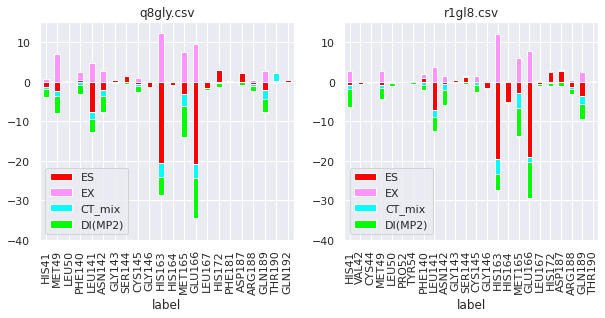

In [ ]:
ifie_data_path = ["q8gly.csv", "r1gl8.csv"]
col = ['#ff0000', '#ff93ff', '#00ffff', '#00ff00']

fig, axes = plt.subplots(nrows=1, ncols=len(ifie_data_path), figsize=(5 * len(ifie_data_path),4))
i = 0
for path, ax in zip(ifie_data_path, axes):
  df = pd.read_csv(path, index_col=False) #csvファイルの読み込み。ヘッダーとレコードのコンマの数が現状合っていないためindex_col=Falseが必要。
  df = df[['FMODB ID', 'Total', 'ES', 'EX', 'CT_mix', 'DI(MP2)', 'Res #', "RES"]]
  df = df.dropna() # RESカラムがNaNのものを除外。~はdf.isnull()[クラスPandas.Series]の否定を表す
  label_list = [str(i).strip() + str(int(j)).strip() for i, j in zip(df['RES'], df['Res #'])] # 残基名と残基番号を結合して一つのラベルにする。内容は、内包表記でzipを使って二つの列から上から順番に1組ずつ値を取り出して、それぞれをi,jに代入した後、文字列として結合する。その際、strip()で文字の左右の空白を取り除く
  df = df.assign(label = label_list) # 先のlabel_listをlabel列として新たに追加
  df = df[~df['RES'].str.contains('HOH')] # 水との相互作用を除去
  df = df[(df['EX'] != 0) | (df['CT_mix'] != 0) | (df['DI(MP2)'] != 0)] # Dimer-ES近似ではないPIEのみ取り出す。
  df = df[['label', 'ES', 'EX', 'CT_mix', 'DI(MP2)']].set_index('label')
  fig_sub = df.plot.bar(ax=ax, stacked=True, color=col, title=path, ylim=[-40,15]) # グラフ描画用のPIEを取り出して積み上げバープロット
  fig_sub#.figure.autofmt_xdate() # グラフのx軸を良い感じにする
  ax.set_title(path)
  i += 1

#fig.savefig("test.png")